In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import itertools


In [44]:
basedir = '/scratch/ias41/ae_code'
project_dir = basedir + '/faers_sider_comparison'
all_aes_meddra_hier_file = basedir + '/indications/data/all_aeolus_aes_hierarchy_output_22_1.xlsx'

In [4]:
# ATC codes
all_atc = pd.read_csv(project_dir + '/data/atc_all.txt', sep='\t')
small_molecule_atc = pd.read_csv(project_dir + '/data/atc_small_molecules.txt', sep='\t')

In [5]:
# ATC codes
all_atc_loc = project_dir + '/data/atc_all.txt'
small_molecule_atc_loc = project_dir + '/data/atc_small_molecules.txt'

In [6]:
# AE datasets

# FAERS
with open(basedir + '/faers_aes/results/20200108_PSM_molregno2aes_PRR2_chi4_faers_min5drugs_all_random_controls.pkl', 'rb') as f:
    molregno2aes_faers = pickle.load(f)

# SIDER
with open(basedir + '/sider/results/20191215_molregno2aes_sider_min5drugs.pkl', 'rb') as f:
    molregno2aes_sider = pickle.load(f)

In [7]:
len(molregno2aes_sider.keys() & molregno2aes_faers.keys())

696

In [83]:
df2_molregnos = molregno2aes_faers.keys()
df2_name = 'FAERS'
df2_colour = 'sandybrown'
df1_molregnos = molregno2aes_sider.keys()
df1_name = 'SIDER clinical'
df1_colour = 'steelblue'

plt.rcdefaults()
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8, 6)) 
sns.set_style("white")
plt.rc('axes', labelsize=15)

all_atc = pd.read_csv(all_atc_loc, sep='\t')
df1_atc = all_atc.loc[all_atc['molregno'].isin(df1_molregnos),:]
df2_atc = all_atc.loc[all_atc['molregno'].isin(df2_molregnos),:]
background_atc = pd.read_csv(small_molecule_atc_loc, sep='\t')

df1_len = len(df1_atc)
df2_len = len(df2_atc)
background_len = len(background_atc)

background_atc_counts = background_atc.groupby('level1_description').count().sort_values(by='molregno',ascending=False)[['molregno']]
background_atc_counts.index = [i.lower().capitalize() for i in background_atc_counts.index]
background_atc_counts.reset_index(inplace=True)
background_atc_counts['ATC labels (%)'] = background_atc_counts['molregno'].apply(lambda x: (x/sum(background_atc_counts['molregno']))*100)
background_atc_counts['dataset'] = 'Small molecule approved drugs (ChEMBL 25) ({} ATC codes)'.format(sum(background_atc_counts['molregno']))

df1_atc_counts = df1_atc.groupby('level1_description').count().sort_values(by='molregno',ascending=False)[['molregno']]
df1_atc_counts.index = [i.lower().capitalize() for i in df1_atc_counts.index]
df1_atc_counts.reset_index(inplace=True)
df1_atc_counts['ATC labels (%)'] = df1_atc_counts['molregno'].apply(lambda x: (x/sum(df1_atc_counts['molregno']))*100)
df1_atc_counts['dataset'] = df1_name + ' ({} ATC codes)'.format(sum(df1_atc_counts['molregno']))

df2_atc_counts = df2_atc.groupby('level1_description').count().sort_values(by='molregno',ascending=False)[['molregno']]
df2_atc_counts.index = [i.lower().capitalize() for i in df2_atc_counts.index]
df2_atc_counts.reset_index(inplace=True)
df2_atc_counts['ATC labels (%)'] = df2_atc_counts['molregno'].apply(lambda x: (x/sum(df2_atc_counts['molregno']))*100)
df2_atc_counts['dataset'] = df2_name + ' ({} ATC codes)'.format(sum(df2_atc_counts['molregno']))

comparison = pd.concat([background_atc_counts, df2_atc_counts, df1_atc_counts]).reset_index(drop=True)
comparison.rename(columns={'index': 'Anatomical Therapeutic Chemical (ATC) Classification'}, inplace=True)


<Figure size 800x600 with 0 Axes>

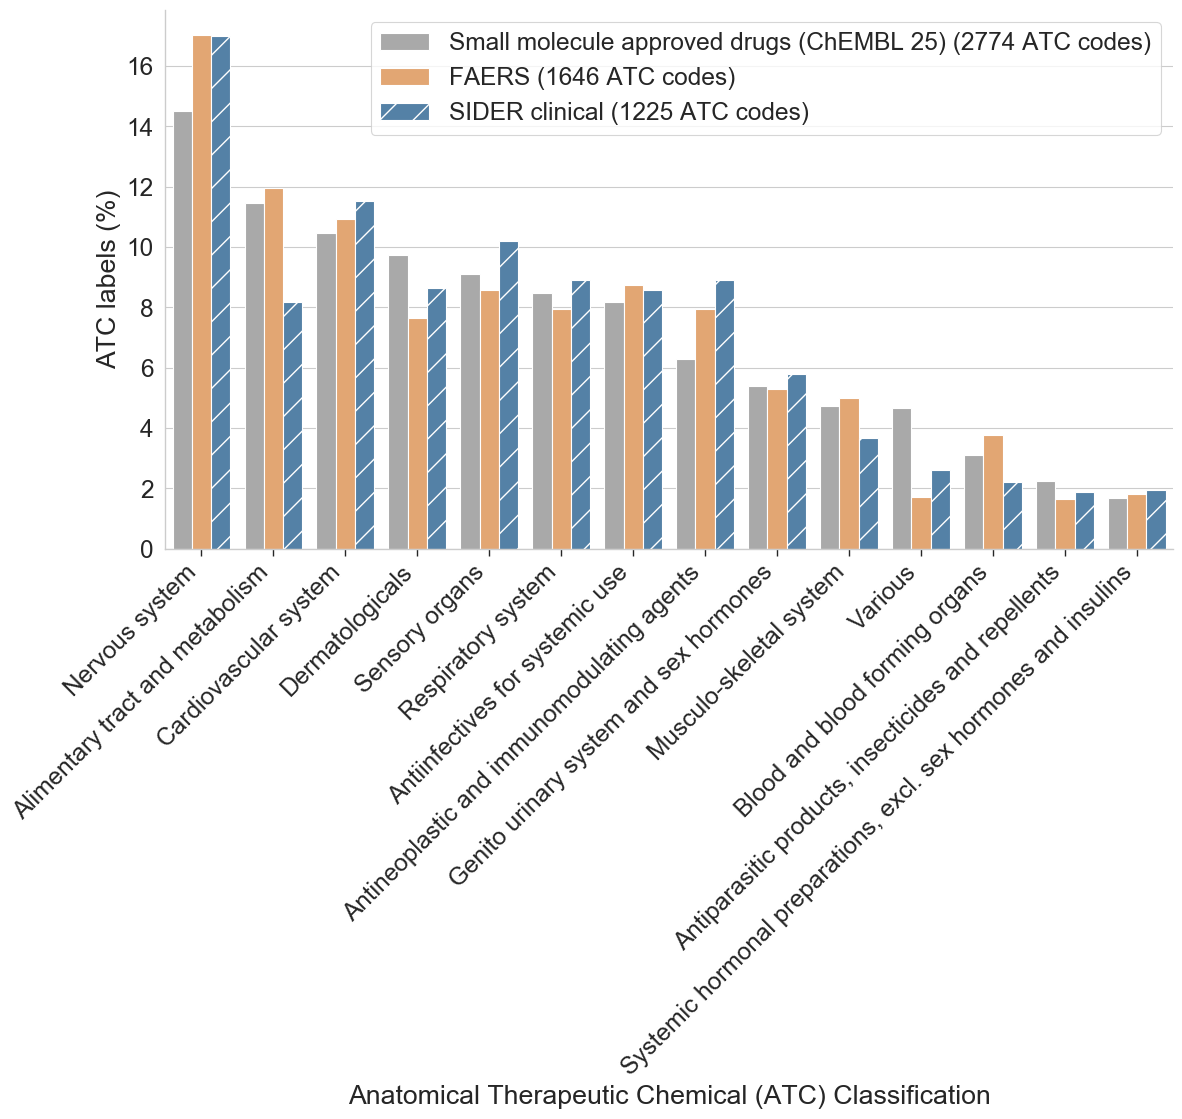

In [85]:
sns.set_style('whitegrid', {'axes.grid' : True, 'xtick.bottom': True, 'axes.spines.right': False, 'axes.spines.top': False})
sns.set_context("paper", font_scale = 2)

f, ax1 = plt.subplots(1,1, figsize=(13,7))

sns.barplot(data=comparison,  y='ATC labels (%)', x='Anatomical Therapeutic Chemical (ATC) Classification', hue='dataset', ax=ax1, palette=['darkgrey','sandybrown','steelblue'])

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')


# Define some hatches
hatches = {}
for i in np.arange(0,28,step=1):
    hatches[i] = ''
for i in np.arange(28,48,step=1):
    hatches[i] = '/'
    
# Loop over the bars
for i,thisbar in enumerate(ax1.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

ax1.legend().set_title('')

current_date = datetime.date.today().strftime("%Y%m%d")

output_loc = project_dir + '/figures'
description = '_all'
plt.savefig(output_loc + '/{}_ATC_bar{}.png'.format(current_date, description) , dpi=200, bbox_inches='tight')
#plt.clf()
#plt.cla()
#plt.close()

In [ ]:
# Observe largest differences

In [102]:
comparison_diffs_sider = background_atc_counts.merge(df1_atc_counts, on='index', suffixes=['_background', '_SIDER'])
comparison_diffs_sider['diffs'] = comparison_diffs_sider['ATC labels (%)_background'] - comparison_diffs_sider['ATC labels (%)_SIDER']
comparison_diffs_sider['% diffs'] = abs(comparison_diffs_sider['diffs']) / comparison_diffs_sider['ATC labels (%)_background']

comparison_diffs_sider.sort_values(by='% diffs')

,index,molregno_background,ATC labels (%)_background,dataset_background,molregno_SIDER,ATC labels (%)_SIDER,dataset_SIDER,diffs,% diffs
6,Antiinfectives for systemic use,227,8.183129,Small molecule approved drugs (ChEMBL 25) (277...,105,8.571429,SIDER clinical (1225 ATC codes),-0.388300,0.047451
5,Respiratory system,235,8.471521,Small molecule approved drugs (ChEMBL 25) (277...,109,8.897959,SIDER clinical (1225 ATC codes),-0.426438,0.050338
8,Genito urinary system and sex hormones,150,5.407354,Small molecule approved drugs (ChEMBL 25) (277...,71,5.795918,SIDER clinical (1225 ATC codes),-0.388564,0.071859
2,Cardiovascular system,290,10.454218,Small molecule approved drugs (ChEMBL 25) (277...,141,11.510204,SIDER clinical (1225 ATC codes),-1.055986,0.101011
3,Dermatologicals,270,9.733237,Small molecule approved drugs (ChEMBL 25) (277...,106,8.653061,SIDER clinical (1225 ATC codes),1.080176,0.110978
4,Sensory organs,253,9.120404,Small molecule approved drugs (ChEMBL 25) (277...,125,10.204082,SIDER clinical (1225 ATC codes),-1.083678,0.118819
13,"Systemic hormonal preparations, excl. sex horm...",47,1.694304,Small molecule approved drugs (ChEMBL 25) (277...,24,1.959184,SIDER clinical (1225 ATC codes),-0.264879,0.156335
12,"Antiparasitic products, insecticides and repel...",62,2.235040,Small molecule approved drugs (ChEMBL 25) (277...,23,1.877551,SIDER clinical (1225 ATC codes),0.357489,0.159947
0,Nervous system,402,14.491709,Small molecule approved drugs (ChEMBL 25) (277...,208,16.979592,SIDER clinical (1225 ATC codes),-2.487883,0.171676
9,Musculo-skeletal system,131,4.722422,Small molecule approved drugs (ChEMBL 25) (277...,45,3.673469,SIDER clinical (1225 ATC codes),1.048953,0.222122


In [96]:
3.300325 / 11.46359

0.28789628728871147

In [97]:
2.487883 / 14.491709

0.17167630125611824

In [98]:
2.519227 / 14.491709

0.17383919315520344

In [106]:
comparison_diffs_faers = background_atc_counts.merge(df2_atc_counts, on='index', suffixes=['_background', '_FAERS'])
comparison_diffs_faers['diffs'] = comparison_diffs_faers['ATC labels (%)_background'] - comparison_diffs_faers['ATC labels (%)_FAERS']
comparison_diffs_faers['% diffs'] = abs(comparison_diffs_faers['diffs']) / comparison_diffs_faers['ATC labels (%)_background']

comparison_diffs_faers.sort_values(by='% diffs')

,index,molregno_background,ATC labels (%)_background,dataset_background,molregno_FAERS,ATC labels (%)_FAERS,dataset_FAERS,diffs,% diffs
8,Genito urinary system and sex hormones,150,5.407354,Small molecule approved drugs (ChEMBL 25) (277...,87,5.285541,FAERS (1646 ATC codes),0.121813,0.022527
1,Alimentary tract and metabolism,318,11.463590,Small molecule approved drugs (ChEMBL 25) (277...,197,11.968408,FAERS (1646 ATC codes),-0.504818,0.044037
2,Cardiovascular system,290,10.454218,Small molecule approved drugs (ChEMBL 25) (277...,180,10.935601,FAERS (1646 ATC codes),-0.481384,0.046047
9,Musculo-skeletal system,131,4.722422,Small molecule approved drugs (ChEMBL 25) (277...,82,4.981774,FAERS (1646 ATC codes),-0.259352,0.054919
5,Respiratory system,235,8.471521,Small molecule approved drugs (ChEMBL 25) (277...,131,7.958688,FAERS (1646 ATC codes),0.512834,0.060536
4,Sensory organs,253,9.120404,Small molecule approved drugs (ChEMBL 25) (277...,141,8.566221,FAERS (1646 ATC codes),0.554183,0.060763
6,Antiinfectives for systemic use,227,8.183129,Small molecule approved drugs (ChEMBL 25) (277...,144,8.748481,FAERS (1646 ATC codes),-0.565352,0.069088
13,"Systemic hormonal preparations, excl. sex horm...",47,1.694304,Small molecule approved drugs (ChEMBL 25) (277...,30,1.822600,FAERS (1646 ATC codes),-0.128296,0.075722
0,Nervous system,402,14.491709,Small molecule approved drugs (ChEMBL 25) (277...,280,17.010936,FAERS (1646 ATC codes),-2.519227,0.173839
3,Dermatologicals,270,9.733237,Small molecule approved drugs (ChEMBL 25) (277...,126,7.654921,FAERS (1646 ATC codes),2.078316,0.213528


In [25]:
def do_atc_bar_plot_three_datasets(df1_molregnos, df1_name, df1_color, df2_molregnos, df2_name, df2_color, all_atc_codes_loc, small_molecule_atc_codes_loc, output_loc, description):
    plt.rcdefaults()
    plt.rcParams.update({'font.size': 15})
    plt.figure(figsize=(8, 6)) 
    sns.set_style("white")
    plt.rc('axes', labelsize=15)
    
    all_atc = pd.read_csv(all_atc_codes_loc, sep='\t')
    df1_atc = all_atc.loc[all_atc['molregno'].isin(df1_molregnos),:]
    df2_atc = all_atc.loc[all_atc['molregno'].isin(df2_molregnos),:]
    background_atc = pd.read_csv(small_molecule_atc_codes_loc, sep='\t')

    df1_len = len(df1_atc)
    df2_len = len(df2_atc)
    background_len = len(background_atc)

    background_atc_counts = background_atc.groupby('level1_description').count().sort_values(by='molregno',ascending=False)[['molregno']]
    background_atc_counts.index = [i.lower().capitalize() for i in background_atc_counts.index]
    background_atc_counts.reset_index(inplace=True)

    df1_atc_counts = df1_atc.groupby('level1_description').count().sort_values(by='molregno',ascending=False)[['molregno']]
    df1_atc_counts.index = [i.lower().capitalize() for i in df1_atc_counts.index]
    df1_atc_counts.reset_index(inplace=True)
    
    df2_atc_counts = df2_atc.groupby('level1_description').count().sort_values(by='molregno',ascending=False)[['molregno']]
    df2_atc_counts.index = [i.lower().capitalize() for i in df2_atc_counts.index]
    df2_atc_counts.reset_index(inplace=True)

    comparison = background_atc_counts.merge(df1_atc_counts, how='outer', on='index').merge(df2_atc_counts, how='outer', on='index')
    comparison.columns = ['ATC level 1 description', 'Small molecule approved drugs count', f'Drugs in {df1_name} dataset count', f'Drugs in {df2_name} dataset count']
    comparison.set_index('ATC level 1 description', drop=True,inplace=True)

    comparison['Small molecule approved drugs %'] = comparison['Small molecule approved drugs count'].apply(lambda x: x/sum(comparison['Small molecule approved drugs count'])*100)
    comparison[f'{df1_name} drugs %'] = comparison[f'Drugs in {df1_name} dataset count'].apply(lambda x: x/sum(comparison[f'Drugs in {df1_name} dataset count'])*100)
    comparison[f'{df2_name} drugs %'] = comparison[f'Drugs in {df2_name} dataset count'].apply(lambda x: x/sum(comparison[f'Drugs in {df2_name} dataset count'])*100)

    comparison_r = comparison.sort_values(by='Small molecule approved drugs %')
    ind = np.arange(len(comparison_r))
    
    fig, ax = plt.subplots()
    width = 0.3

    ax.barh(ind, comparison_r['Small molecule approved drugs %'], width, label='Approved small molecule drugs (ChEMBL 25) ({} ATC codes)'.format(background_len), color='darkgrey')
    ax.barh(ind + width, comparison_r[f'{df1_name} drugs %'], width, label='{} drugs ({} ATC codes)'.format(df1_name, df1_len), color=df1_color)
    ax.barh(ind + width + width, comparison_r[f'{df2_name} drugs %'], width, label='{} drugs ({} ATC codes)'.format(df2_name, df2_len), color=df2_color)
    
    ax.set(yticks=ind + width, yticklabels=comparison_r.index, ylim=[2*width -1, len(comparison_r)])
    ax.set_xlabel('ATC labels (%)')
    ax.set_ylabel('Anatomical Therapeutic Chemical (ATC) Classification')

    handles, labels = plt.gca().get_legend_handles_labels()
    order = [2,1,0]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=(-0.35,1.05))

    #ax.set_xticks([i for i in range(1,21,2)])

    current_date = datetime.date.today().strftime("%Y%m%d")
    plt.savefig(output_loc + '/{}_ATC_bar{}.png'.format(current_date, description) , dpi=200, bbox_inches='tight')
    plt.clf()
    plt.cla()
    plt.close()

In [26]:
#do_atc_bar_plot_three_datasets(df2_molregnos=molregno2aes_faers.keys(), df2_name='FAERS', df2_color='sandybrown', df1_molregnos=molregno2aes_sider.keys(), df1_name='SIDER clinical', df1_color='steelblue', all_atc_codes_loc=all_atc_loc, small_molecule_atc_codes_loc=small_molecule_atc_loc, output_loc=project_dir + '/figures', description='_all')


In [14]:
faers_unique_drugs = molregno2aes_faers.keys() - molregno2aes_sider.keys()
sider_unique_drugs = molregno2aes_sider.keys() - molregno2aes_faers.keys()

In [15]:
len(faers_unique_drugs), len(sider_unique_drugs)

(567, 331)

In [16]:
#do_atc_bar_plot_three_datasets(df2_molregnos=faers_unique_drugs, df2_name='FAERS', df2_color='sandybrown', df1_molregnos=sider_unique_drugs, df1_name='SIDER clinical', df1_color='darkslateblue', all_atc_codes_loc=all_atc_loc, small_molecule_atc_codes_loc=small_molecule_atc_loc, output_loc=project_dir + '/figures', description='_unique_drugs')


<Figure size 800x600 with 0 Axes>

### Drug counts and overlap


In [107]:
len(molregno2aes_faers), len(molregno2aes_sider)

(1263, 1027)

In [108]:
# Overlap
len(molregno2aes_faers.keys() & molregno2aes_sider.keys())

696

In [109]:
faers_all_aes = set([i for i in itertools.chain(*[molregno2aes_faers[molregno] for molregno in molregno2aes_faers.keys()])])
sider_all_aes = set([i for i in itertools.chain(*[molregno2aes_sider[molregno] for molregno in molregno2aes_sider.keys()])])

In [110]:
len(faers_all_aes), len(sider_all_aes), len(faers_all_aes & sider_all_aes)

(3365, 1131, 1014)

In [111]:
counts_dict = dict()

total_unique_drugs  = len(molregno2aes_faers.keys() | molregno2aes_sider.keys())
overlapping_drugs = len(molregno2aes_faers.keys() & molregno2aes_sider.keys())
faers_only_drugs = len(molregno2aes_faers.keys() - molregno2aes_sider.keys())
sider_only_drugs = len(molregno2aes_sider.keys() - molregno2aes_faers.keys())

counts_dict['Drugs (n = {:,})'.format(total_unique_drugs)] = {'Overlapping': (overlapping_drugs/total_unique_drugs)*100, 'FAERS only': (faers_only_drugs/total_unique_drugs)*100, 'SIDER only': (sider_only_drugs/total_unique_drugs)*100}

In [112]:
total_unique_aes  = len(faers_all_aes | sider_all_aes)
overlapping_aes = len(faers_all_aes & sider_all_aes)
faers_only_aes = len(faers_all_aes - sider_all_aes)
sider_only_aes = len(sider_all_aes - faers_all_aes)

counts_dict['Adverse events (PT) (n = {:,})'.format(total_unique_aes)] = {'Overlapping': (overlapping_aes/total_unique_aes)*100, 'FAERS only': (faers_only_aes/total_unique_aes)*100, 'SIDER only': (sider_only_aes/total_unique_aes)*100}

In [113]:
counts_dict

{'Drugs (n = 1,594)': {'Overlapping': 43.66373902132999,
  'FAERS only': 35.570890840652446,
  'SIDER only': 20.765370138017566},
 'Adverse events (PT) (n = 3,482)': {'Overlapping': 29.121194715680645,
  'FAERS only': 67.51866743251004,
  'SIDER only': 3.360137851809305}}

In [114]:
with open(project_dir + '/results/ae_datasets_counts.txt', 'a') as f:
    f.write('Number of unique drugs (FAERS):\t {}'.format(str(len(molregno2aes_faers.keys() ))))
    f.write('\nNumber of unique drugs (SIDER):\t {}'.format(str(len(molregno2aes_sider.keys()))))
    f.write('\nNumber of overlapping drugs:\t {}'.format(str(overlapping_drugs)))
    f.write('\nNumber of unique AEs (FAERS):\t {}'.format(str(faers_only_aes)))
    f.write('\nNumber of unique AEs (SIDER):\t {}'.format(str(sider_only_aes)))
    f.write('\nNumber of AEs overlapping:\t {}'.format(overlapping_aes))
    f.write('\nNumber of AEs specific to FAERS:\t {}'.format(faers_only_aes))
    f.write('\nNumber of AEs specific to SIDER:\t {}'.format(sider_only_aes))

### Compare at HLT level

In [115]:
# Open file with HLTs for all AE meddra terms
meddra_hlgt = pd.read_excel(all_aes_meddra_hier_file,skiprows=4)
meddra_hlgt.columns = ['Row ID', 'Term', ' Code', 'Level', 'PT', 'PT Code', 'HLT', 'HLT Code',
       'HLGT', 'HLGT Code', 'SOC', 'SOC Code', 'Primary SOC']
meddra_hlgt['Term'] = [i.upper() for i in meddra_hlgt['Term']]
meddra_hlgt['PT'] = [i.upper() for i in meddra_hlgt['PT']]

In [116]:
term2hlt = dict()
hlt2terms = dict()
for hlt in set(meddra_hlgt['HLT'].drop_duplicates()):
    hlt2terms[hlt] = set()
    
for row in meddra_hlgt[['Term','HLT']].iterrows():
    term = row[1]['Term']
    hlt = row[1]['HLT']
    term2hlt[term] = hlt
    hlt2terms[hlt].add(term)

In [117]:
faers_all_hlts = set()
for term in faers_all_aes:
    try:
        faers_all_hlts.add(term2hlt[term])
    except KeyError:
        continue
sider_all_hlts = set()
for term in sider_all_aes:
    try:
        sider_all_hlts.add(term2hlt[term])
    except KeyError:
        continue

In [118]:
total_unique_hlts  = len(faers_all_hlts | sider_all_hlts)
overlapping_hlts = len(faers_all_hlts & sider_all_hlts)
faers_only_hlts = len(faers_all_hlts - sider_all_hlts)
sider_only_hlts = len(sider_all_hlts - faers_all_hlts)

counts_dict['Adverse events (HLT) (n = {:,})'.format(total_unique_hlts)] = {'Overlapping': (overlapping_hlts/total_unique_hlts)*100, 'FAERS only': (faers_only_hlts/total_unique_hlts)*100, 'SIDER only': (sider_only_hlts/total_unique_hlts)*100}

In [119]:
counts_dict

{'Drugs (n = 1,594)': {'Overlapping': 43.66373902132999,
  'FAERS only': 35.570890840652446,
  'SIDER only': 20.765370138017566},
 'Adverse events (PT) (n = 3,482)': {'Overlapping': 29.121194715680645,
  'FAERS only': 67.51866743251004,
  'SIDER only': 3.360137851809305},
 'Adverse events (HLT) (n = 945)': {'Overlapping': 51.53439153439153,
  'FAERS only': 46.455026455026456,
  'SIDER only': 2.0105820105820107}}

In [120]:
counts_df = pd.DataFrame.from_dict(counts_dict, orient='index')

In [121]:
counts_df

,Overlapping,FAERS only,SIDER only
"Drugs (n = 1,594)",43.663739,35.570891,20.765370
"Adverse events (PT) (n = 3,482)",29.121195,67.518667,3.360138
Adverse events (HLT) (n = 945),51.534392,46.455026,2.010582


In [122]:
counts_df.index.name = 'Category'

In [123]:
counts_df

,Overlapping,FAERS only,SIDER only
Category,,,
"Drugs (n = 1,594)",43.663739,35.570891,20.765370
"Adverse events (PT) (n = 3,482)",29.121195,67.518667,3.360138
Adverse events (HLT) (n = 945),51.534392,46.455026,2.010582


In [124]:
# Control the order
drugs_index = [i for i in counts_df.index if 'Drugs' in i][0]
pts_index = [i for i in counts_df.index if 'PT' in i][0]
hlts_index = [i for i in counts_df.index if 'HLT' in i][0]
counts_df = counts_df.reindex([hlts_index,pts_index,drugs_index])

In [125]:
counts_df

,Overlapping,FAERS only,SIDER only
Category,,,
Adverse events (HLT) (n = 945),51.534392,46.455026,2.010582
"Adverse events (PT) (n = 3,482)",29.121195,67.518667,3.360138
"Drugs (n = 1,594)",43.663739,35.570891,20.765370


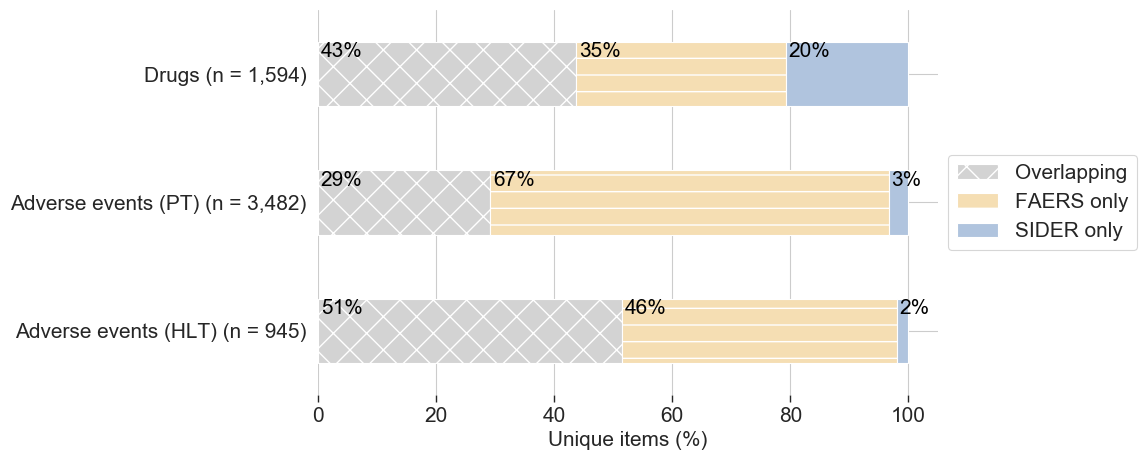

In [126]:
ax = counts_df.plot.barh(stacked=True, figsize=(8,5), color=['lightgrey', 'wheat', 'lightsteelblue'], fontsize=15)
plt.xlabel('Unique items (%)', fontsize=15)
plt.ylabel('')
plt.legend(fontsize=15)
#plt.savefig(project_dir + '/figures/SOC_drug_ae_pairs.png', dpi = 199, bbox_inches='tight')

bars = ax.patches
patterns =('x', '-', '')
hatches = [p for p in patterns for i in range(len(counts_df))]
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

for lbl in ax.patches:
    ax.annotate("{:.0f}%".format(int(lbl.get_width())), (lbl.get_x()+0.5, lbl.get_y()+0.35), verticalalignment='bottom', fontsize=15, color='black')

ax.legend(loc='center left', bbox_to_anchor=(1.0, .5), fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig(project_dir + '/figures/Drugs_AEs_overlap_stacked_bar.png', dpi = 199, bbox_inches='tight')


### Distribution of nr. AEs per drug

In [127]:
### FAERS counts

# Make ae_couns list
ae_counts_faers = []
for key in molregno2aes_faers.keys():
    ae_counts_faers.append(len(molregno2aes_faers[key]))

# Sider counts
sider_ae_counts = []
for key in molregno2aes_sider.keys():
    sider_ae_counts.append(len(molregno2aes_sider[key]))

with open(project_dir + '/results/aes_per_compound_describe.txt', 'a') as f:
    f.write('\nNumber of AEs per compound (FAERS):\n' + str(pd.Series(ae_counts_faers).describe()) +  f'\nmedian: {np.median(ae_counts_faers)}')
    f.write('\nNumber of AEs per compound (SIDER):\n' + str(pd.Series(sider_ae_counts).describe()) + f'\nmedian: {np.median(sider_ae_counts)}')


In [128]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6)) 
sns.set_style("white")
plt.rc('axes', labelsize=12)
fig, ax = plt.subplots(figsize=(8,6)) 

bins = np.arange(min(ae_counts_faers), max(ae_counts_faers) + 10, 10)
bins2 = np.arange(min(ae_counts_faers), max(ae_counts_faers) + 10, 10)

ax.hist(sider_ae_counts, bins=bins, alpha=0.6, label='SIDER', color='darkslateblue')
ax.hist(ae_counts_faers, bins=bins, alpha=0.6, label='FAERS', color='sandybrown')
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of significantely associated adverse\nevents per drug')
ax.tick_params(axis='both', which='major', labelsize=12)

axins = inset_axes(ax,
                        width="60%", # width = % of parent_bbox
                        height="60%", 
                        loc=1)

axins.hist(sider_ae_counts, bins=bins2, alpha=0.6, label=f'SIDER ({len(sider_ae_counts)} drugs)', color='darkslateblue')
axins.hist(ae_counts_faers, bins=bins2, alpha=0.6, label=f'FAERS ({len(ae_counts_faers)} drugs)', color='sandybrown')
axins.tick_params(axis='both', which='major', labelsize=12)


x1, x2, y1, y2 = 0, 200, 0, max(ax.get_ylim())-1 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.1", linestyle="-.")
axins.legend(loc=1, fontsize=12)
current_date = datetime.date.today().strftime("%Y%m%d")
plt.savefig(f'{project_dir}/figures/{current_date}_ae_counts_inset.png', dpi=200, bbox_inches='tight')
plt.clf()
plt.cla()
plt.close()

<Figure size 800x600 with 0 Axes>

### SOC of AEs barchart

In [154]:
# Make term to SOC dict

term2soc= dict()
    
for row in meddra_hlgt.loc[meddra_hlgt['Primary SOC']=='Y',['Term','SOC']].iterrows():
    term = row[1]['Term']
    soc = row[1]['SOC']
    term2soc[term] = soc

In [155]:
all_socs = list(meddra_hlgt.loc[meddra_hlgt['Primary SOC']=='Y','SOC'].drop_duplicates())

In [156]:
faers_socs = pd.DataFrame(faers_all_aes, columns=['adverse event'])
faers_socs['SOC'] = faers_socs['adverse event'].apply(lambda x: term2soc[x])

In [157]:
faers_soc_counts = faers_socs.groupby('SOC').count()
faers_soc_counts['% adverse events'] = (faers_soc_counts['adverse event'] / len(faers_socs))*100
faers_soc_counts['dataset'] = 'FAERS (n={} drugs)'.format(len(faers_socs['adverse event'].drop_duplicates()))
faers_soc_counts.reset_index(drop=False, inplace=True)

In [158]:
sider_socs = pd.DataFrame(sider_all_aes, columns=['adverse event'])
def get_soc(term):
    try:
        soc = term2soc[term]
        return soc
    except KeyError:
        return None
sider_socs['SOC'] = sider_socs['adverse event'].apply(lambda x: get_soc(x))

In [159]:
sider_socs = sider_socs.loc[~sider_socs['SOC'].isnull()]

In [160]:
sider_soc_counts = sider_socs.groupby('SOC').count()
sider_soc_counts['% adverse events'] = (sider_soc_counts['adverse event'] / len(sider_socs))*100
sider_soc_counts['dataset'] = 'SIDER (n={} drugs)'.format(len(sider_socs['adverse event'].drop_duplicates()))
sider_soc_counts.reset_index(drop=False, inplace=True)

In [161]:
both_socs = pd.concat([sider_soc_counts, faers_soc_counts])

In [162]:
both_socs

,SOC,adverse event,% adverse events,dataset
0,Blood and lymphatic system disorders,29,2.566372,SIDER (n=1130 drugs)
1,Cardiac disorders,54,4.778761,SIDER (n=1130 drugs)
2,"Congenital, familial and genetic disorders",8,0.707965,SIDER (n=1130 drugs)
3,Ear and labyrinth disorders,10,0.884956,SIDER (n=1130 drugs)
4,Endocrine disorders,16,1.415929,SIDER (n=1130 drugs)
5,Eye disorders,71,6.283186,SIDER (n=1130 drugs)
6,Gastrointestinal disorders,97,8.584071,SIDER (n=1130 drugs)
7,General disorders and administration site cond...,72,6.371681,SIDER (n=1130 drugs)
8,Hepatobiliary disorders,26,2.300885,SIDER (n=1130 drugs)
9,Immune system disorders,12,1.061947,SIDER (n=1130 drugs)


In [163]:
SOC_order = list(faers_soc_counts.sort_values(by='% adverse events', ascending=False)['SOC'])#.sort_values(by='% adverse events').index)

In [164]:
SOC_order

['Investigations',
 'Infections and infestations',
 'Gastrointestinal disorders',
 'Nervous system disorders',
 'Injury, poisoning and procedural complications',
 'General disorders and administration site conditions',
 'Psychiatric disorders',
 'Neoplasms benign, malignant and unspecified (incl cysts and polyps)',
 'Musculoskeletal and connective tissue disorders',
 'Respiratory, thoracic and mediastinal disorders',
 'Skin and subcutaneous tissue disorders',
 'Cardiac disorders',
 'Surgical and medical procedures',
 'Eye disorders',
 'Vascular disorders',
 'Metabolism and nutrition disorders',
 'Renal and urinary disorders',
 'Blood and lymphatic system disorders',
 'Reproductive system and breast disorders',
 'Hepatobiliary disorders',
 'Congenital, familial and genetic disorders',
 'Pregnancy, puerperium and perinatal conditions',
 'Immune system disorders',
 'Social circumstances',
 'Ear and labyrinth disorders',
 'Endocrine disorders',
 'Product issues']

In [165]:
both_socs['SOC'] = both_socs['SOC'].astype('category')
both_socs['SOC'].cat.set_categories(SOC_order, inplace=True)

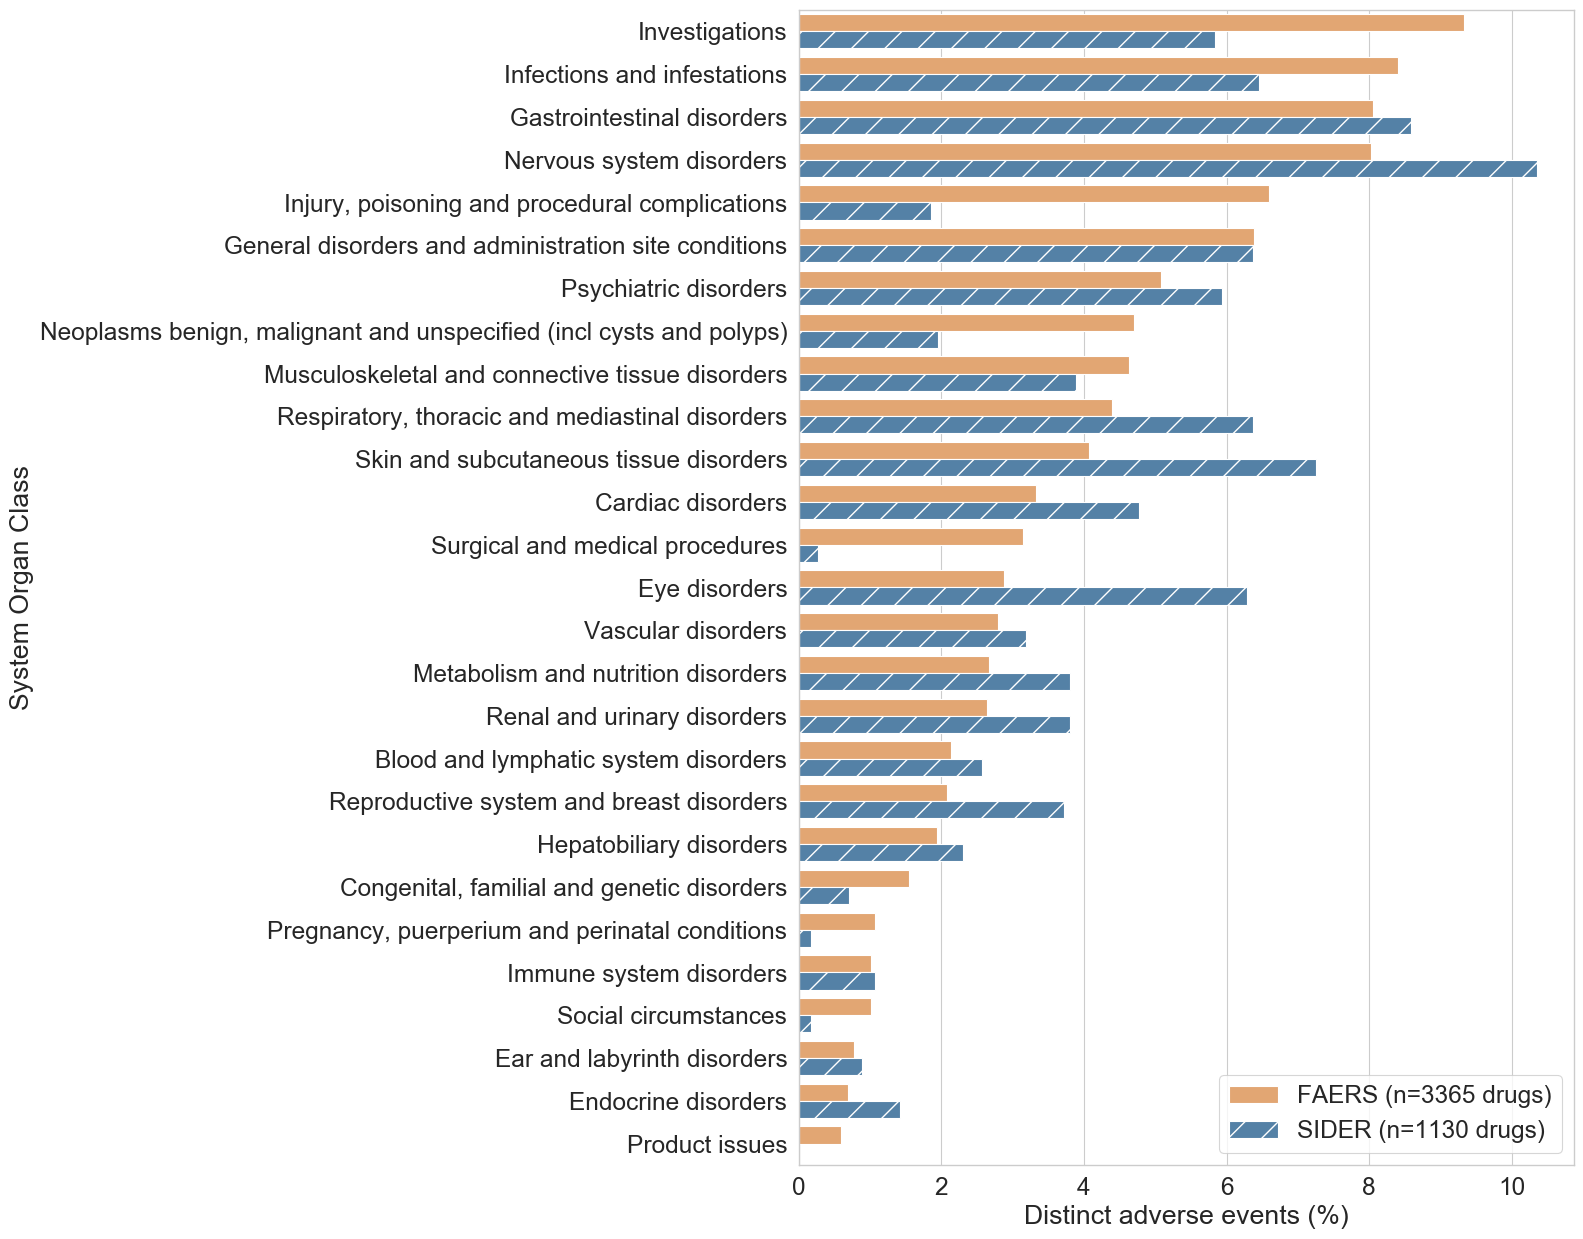

In [166]:
plt.figure(figsize=(10,15))
sns.set_style('whitegrid')
sns.set_context("paper", font_scale = 2)

ax = sns.barplot(data=both_socs, x='% adverse events', y='SOC', hue='dataset', hue_order=['FAERS (n=3365 drugs)','SIDER (n=1130 drugs)'], palette=['sandybrown','steelblue'])

# Define some hatches
hatches = {}
for i in np.arange(0,27,step=1):
    hatches[i] = ''
for i in np.arange(27,54,step=1):
    hatches[i] = '/'
    
# Loop over the bars
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

ax.legend().set_title('')
ax.legend(loc=4)
ax.set_xlabel('Distinct adverse events (%)')
ax.set_ylabel('System Organ Class')

current_date = datetime.date.today().strftime("%Y%m%d")
plt.savefig(f'{project_dir}/figures/{current_date}_AEs_all_bySOC.png', dpi=200, bbox_inches='tight')


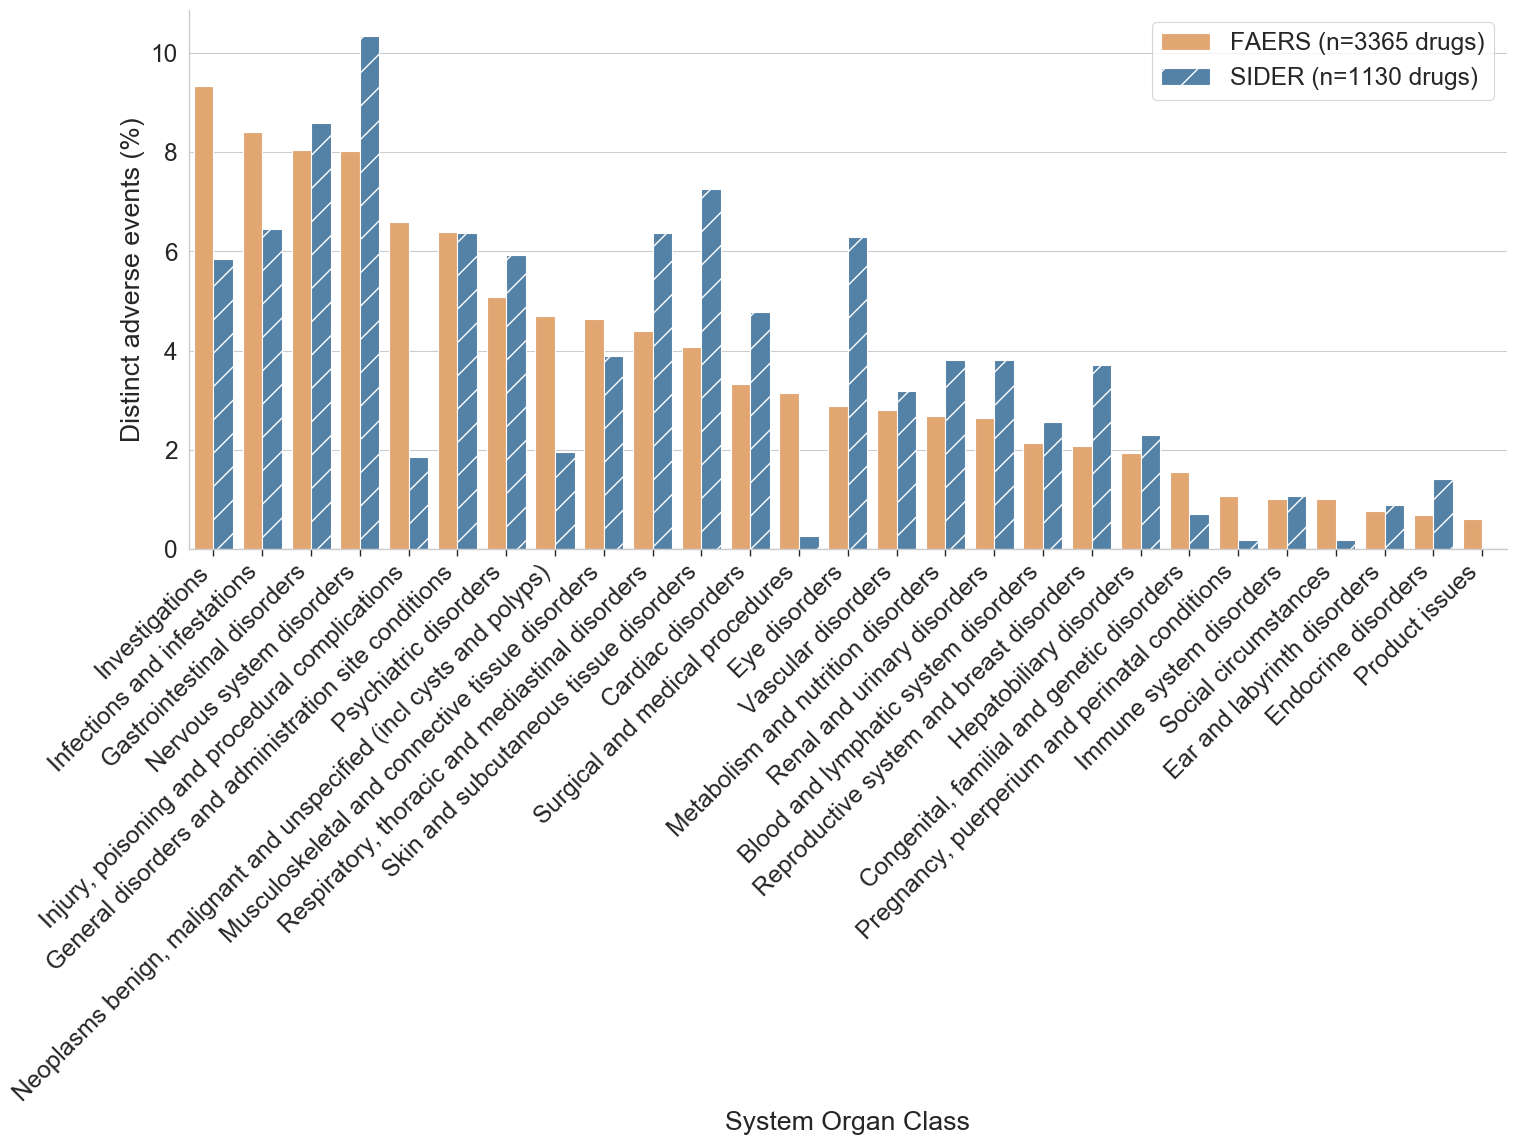

In [167]:
sns.set_style('whitegrid', {'axes.grid' : True, 'xtick.bottom': True, 'axes.spines.right': False, 'axes.spines.top': False})
sns.set_context("paper", font_scale = 2)

plt.figure(figsize=(17,7))


ax = sns.barplot(data=both_socs, y='% adverse events', x='SOC', hue='dataset', hue_order=['FAERS (n=3365 drugs)','SIDER (n=1130 drugs)'], palette=['sandybrown','steelblue'])
ax.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')


# Define some hatches
hatches = {}
for i in np.arange(0,27,step=1):
    hatches[i] = ''
for i in np.arange(27,54,step=1):
    hatches[i] = '/'
    
# Loop over the bars
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

ax.legend().set_title('')
ax.legend(loc=1)
ax.set_ylabel('Distinct adverse events (%)')
ax.set_xlabel('System Organ Class')

current_date = datetime.date.today().strftime("%Y%m%d")
plt.savefig(f'{project_dir}/figures/{current_date}_AEs_all_bySOC_vert.png', dpi=200, bbox_inches='tight')


### Do the same for AEs that are unique to FAERS and SIDER datasets

In [60]:
aes_unique_to_faers = faers_all_aes - sider_all_aes
aes_unique_to_sider = sider_all_aes - faers_all_aes

In [61]:
len(aes_unique_to_faers), len(aes_unique_to_sider)

(2351, 117)

In [62]:
faers_socs_unique = pd.DataFrame(aes_unique_to_faers, columns=['adverse event'])
faers_socs_unique['SOC'] = faers_socs_unique['adverse event'].apply(lambda x: term2soc[x])
faers_soc_counts_unique = faers_socs_unique.groupby('SOC').count()
faers_soc_counts_unique['% adverse events'] = (faers_soc_counts_unique['adverse event'] / len(faers_socs_unique))*100
faers_soc_counts_unique['dataset'] = 'FAERS'
faers_soc_counts_unique.reset_index(drop=False, inplace=True)

In [63]:
sider_socs_unique = pd.DataFrame(aes_unique_to_sider, columns=['adverse event'])
def get_soc(term):
    try:
        soc = term2soc[term]
        return soc
    except KeyError:
        return None
sider_socs_unique['SOC'] = sider_socs_unique['adverse event'].apply(lambda x: get_soc(x))
sider_socs_unique = sider_socs_unique.loc[~sider_socs_unique['SOC'].isnull()]
sider_soc_counts_unique = sider_socs_unique.groupby('SOC').count()
sider_soc_counts_unique['% adverse events'] = (sider_soc_counts_unique['adverse event'] / len(sider_socs_unique))*100
sider_soc_counts_unique['dataset'] = 'SIDER'
sider_soc_counts_unique.reset_index(drop=False, inplace=True)

In [64]:
both_socs_unique = pd.concat([sider_soc_counts_unique, faers_soc_counts_unique])

In [65]:
SOC_order_unique = list(faers_soc_counts_unique.sort_values(by='% adverse events', ascending=False)['SOC'])#.sort_values(by='% adverse events').index)

In [66]:
both_socs_unique['SOC'] = both_socs_unique['SOC'].astype('category')
both_socs_unique['SOC'].cat.set_categories(SOC_order_unique, inplace=True)

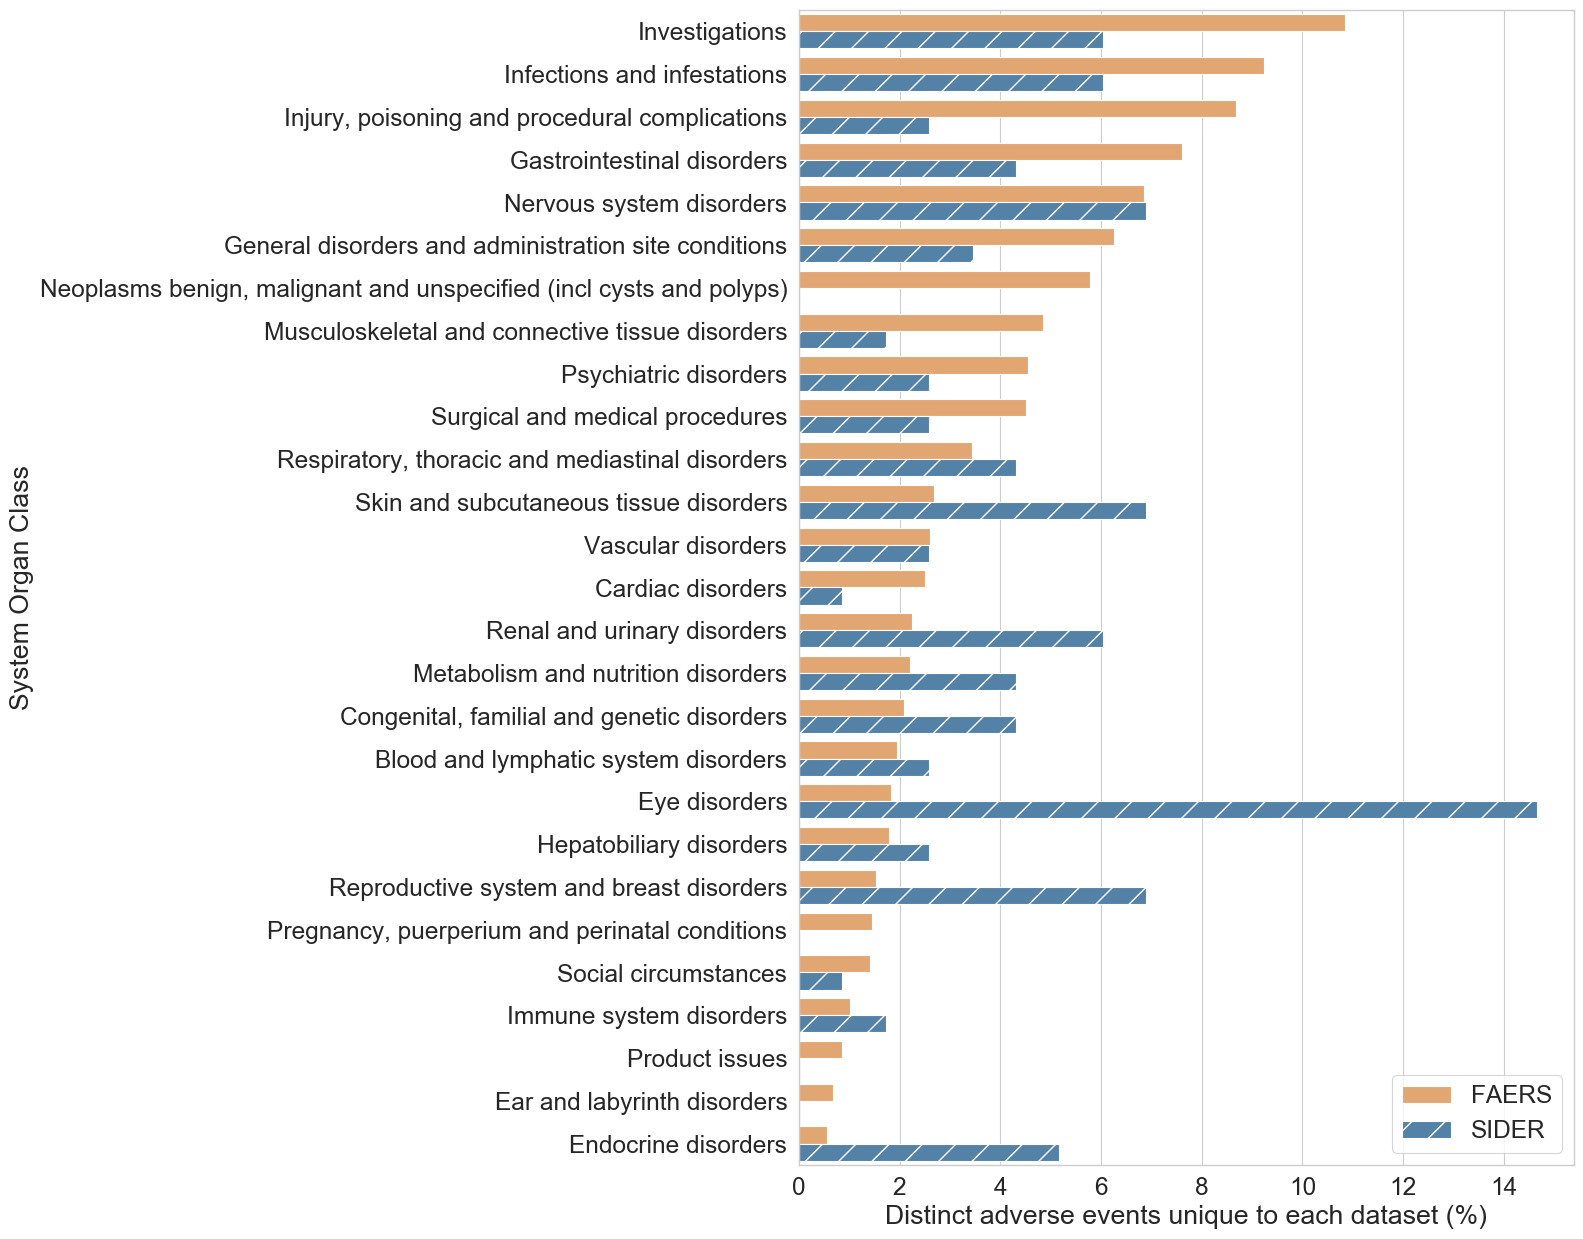

In [69]:
plt.figure(figsize=(10,15))
sns.set_style('whitegrid')
sns.set_context("paper", font_scale = 2)

ax = sns.barplot(data=both_socs_unique, x='% adverse events', y='SOC', hue='dataset', hue_order=['FAERS','SIDER'], palette=['sandybrown','steelblue'])

# Define some hatches
hatches = {}
for i in np.arange(0,27,step=1):
    hatches[i] = ''
for i in np.arange(27,54,step=1):
    hatches[i] = '/'
    
# Loop over the bars
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])


ax.legend().set_title('')
ax.legend(loc=4)
ax.set_xlabel('Distinct adverse events unique to each dataset (%)')
ax.set_ylabel('System Organ Class')

current_date = datetime.date.today().strftime("%Y%m%d")
plt.savefig(f'{project_dir}/figures/{current_date}_AEs_uniqueDataset_bySOC.png', dpi=200, bbox_inches='tight')


### Do the same for % of drugs have side effect in that SOC

In [70]:
molregno2ae_set = set() 
for k, v in molregno2aes_faers.items():
    for ae in v:
        molregno2ae_set.add((k,ae))

In [71]:
molregno2ae_df = pd.DataFrame(molregno2ae_set, columns=['molregno', 'adverse event'])
molregno2ae_df['SOC'] = molregno2ae_df['adverse event'].apply(lambda x: term2soc[x])

In [72]:
molregno2ae_counts = molregno2ae_df.groupby('SOC').nunique()
molregno2ae_counts['% drugs'] = (molregno2ae_counts['molregno'] / len(molregno2aes_faers))*100
molregno2ae_counts['dataset'] = 'FAERS'

In [73]:
molregno2ae_set_sider = set() 
for k, v in molregno2aes_sider.items():
    for ae in v:
        molregno2ae_set_sider.add((k,ae))

In [74]:
molregno2ae_df_sider = pd.DataFrame(molregno2ae_set_sider, columns=['molregno', 'adverse event'])
molregno2ae_df_sider['SOC'] = molregno2ae_df_sider['adverse event'].apply(lambda x: get_soc(x))
molregno2ae_df_sider = molregno2ae_df_sider.loc[~molregno2ae_df_sider['SOC'].isnull()]
molregno2ae_counts_sider = molregno2ae_df_sider.groupby('SOC').nunique()
molregno2ae_counts_sider['% drugs'] = (molregno2ae_counts_sider['molregno'] / len(molregno2aes_sider))*100
molregno2ae_counts_sider['dataset'] = 'SIDER'

In [75]:
sum(molregno2ae_counts_sider['% drugs']), sum(molregno2ae_counts['% drugs'])

(1043.5248296007787, 1211.0055423594617)

In [76]:
both_socs_all = pd.concat([molregno2ae_counts_sider, molregno2ae_counts])
both_socs_all.drop(labels=['SOC'], axis=1, inplace=True)

In [77]:
both_socs_all.reset_index(drop=False, inplace=True)

In [78]:
SOC_order_all = list(molregno2ae_counts.sort_values(by='% drugs', ascending=False).index)
both_socs_all['SOC'] = both_socs_all['SOC'].astype('category')
both_socs_all['SOC'].cat.set_categories(SOC_order_all, inplace=True)

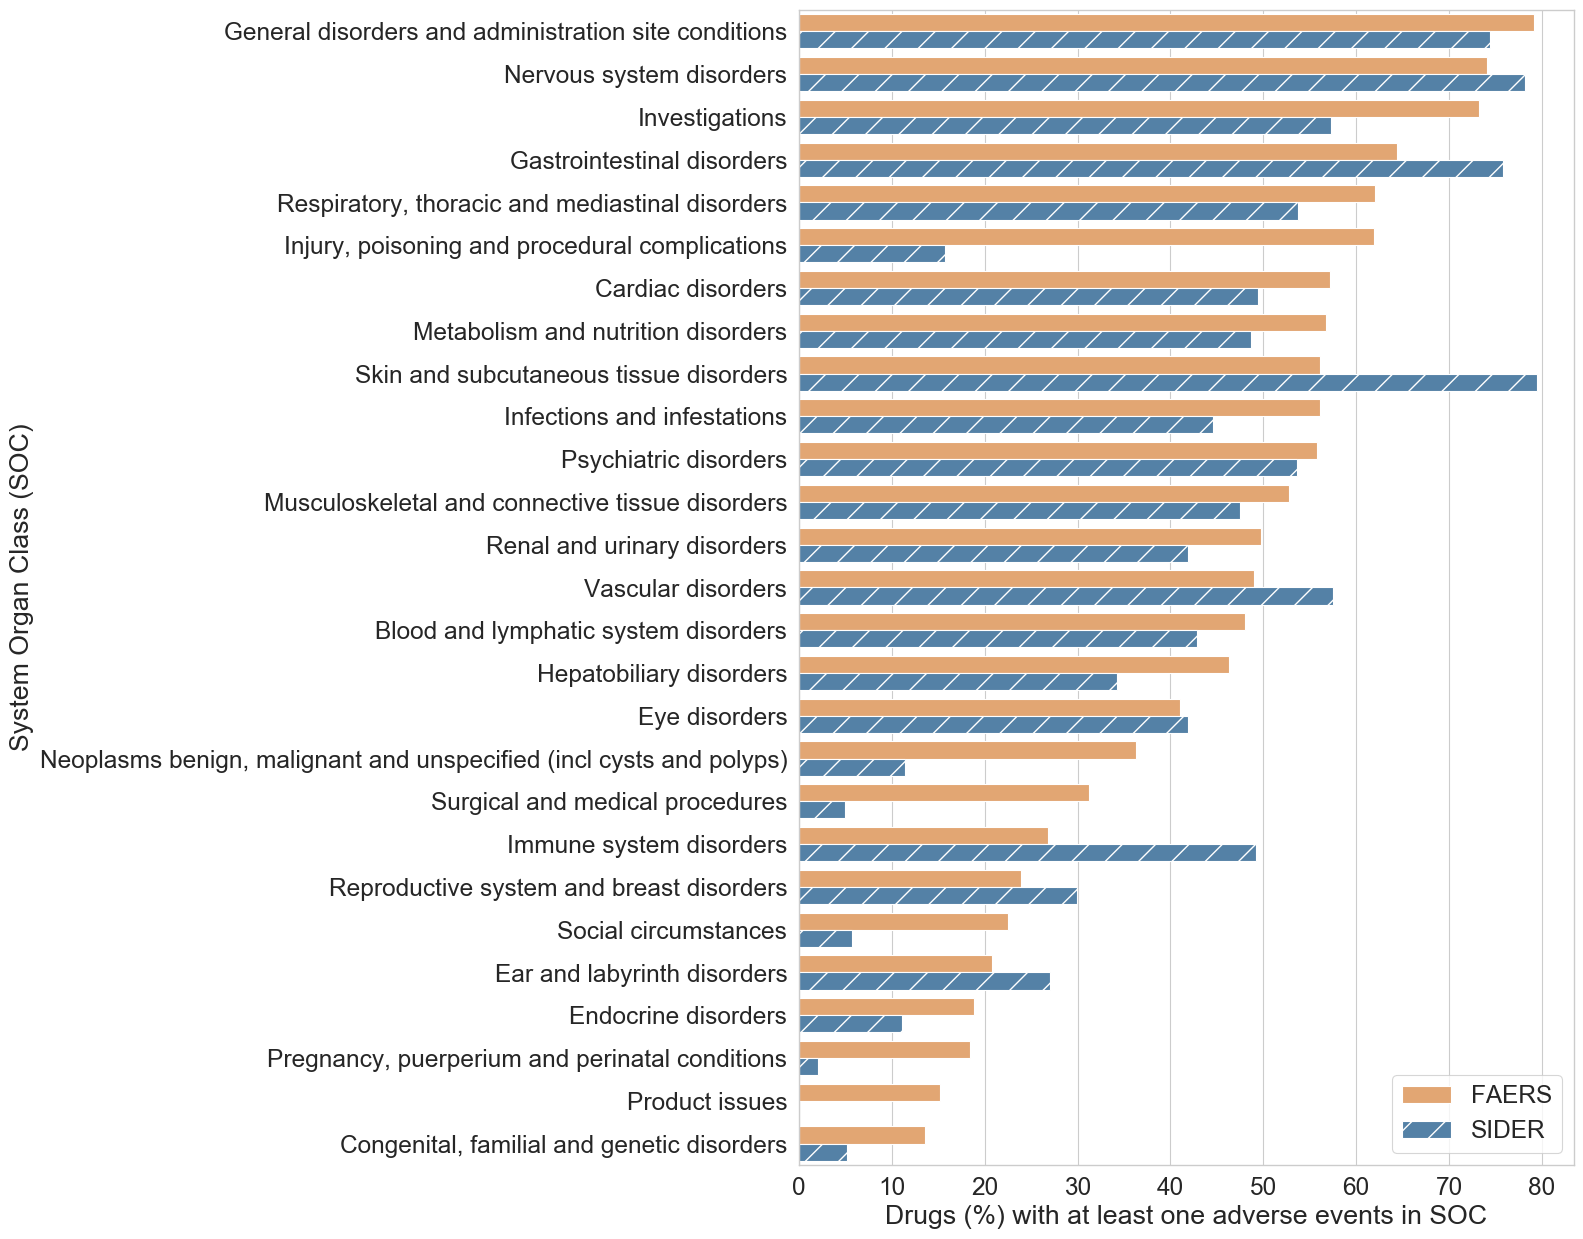

In [80]:
plt.figure(figsize=(10,15))
sns.set_style('whitegrid')
sns.set_context("paper", font_scale = 2)

ax = sns.barplot(data=both_socs_all, x='% drugs', y='SOC', hue='dataset', hue_order=['FAERS','SIDER'], palette=['sandybrown','steelblue'])

# Define some hatches
hatches = {}
for i in np.arange(0,27,step=1):
    hatches[i] = ''
for i in np.arange(27,54,step=1):
    hatches[i] = '/'
    
# Loop over the bars
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])


ax.legend().set_title('')
ax.legend(loc=4)
ax.set_xlabel('Drugs (%) with at least one adverse events in SOC')
ax.set_ylabel('System Organ Class (SOC)')

current_date = datetime.date.today().strftime("%Y%m%d")
plt.savefig(f'{project_dir}/figures/{current_date}_Perc_drugs_bySOC.png', dpi=200, bbox_inches='tight')


### What % of AEs overlap for the same drugs in FAERS and SIDER

In [81]:
overlapping_compounds = (molregno2aes_faers.keys() & molregno2aes_sider.keys())
len(overlapping_compounds)

696

In [82]:
ae_overlap_info = dict()

for drug in overlapping_compounds:
    total_nr_aes = len(molregno2aes_faers[drug] | molregno2aes_sider[drug])
    perc_overlapping = (len(molregno2aes_faers[drug] & molregno2aes_sider[drug]) / total_nr_aes) * 100
    perc_faers_unique = (len(molregno2aes_faers[drug] - molregno2aes_sider[drug]) / total_nr_aes) * 100
    perc_sider_unique = (len(molregno2aes_sider[drug] - molregno2aes_faers[drug]) / total_nr_aes) * 100
    
    ae_overlap_info[drug] = {'Overlapping': perc_overlapping, 'FAERS only': perc_faers_unique, 'SIDER only': perc_sider_unique}

In [83]:
ae_overlap_df = pd.DataFrame.from_dict(ae_overlap_info, orient='index')

In [84]:
ae_overlap_df.head(100)

,Overlapping,FAERS only,SIDER only
22528,3.184713,50.318471,46.496815
36864,9.090909,36.363636,54.545455
403465,8.771930,12.280702,78.947368
112651,1.408451,2.816901,95.774648
421902,0.000000,5.882353,94.117647
...,...,...,...
448872,6.666667,23.333333,70.000000
485738,0.785340,97.382199,1.832461
94571,5.882353,47.058824,47.058824
422253,0.000000,93.548387,6.451613


In [85]:
ae_overlap_df.count()

Overlapping    696
FAERS only     696
SIDER only     696
dtype: int64

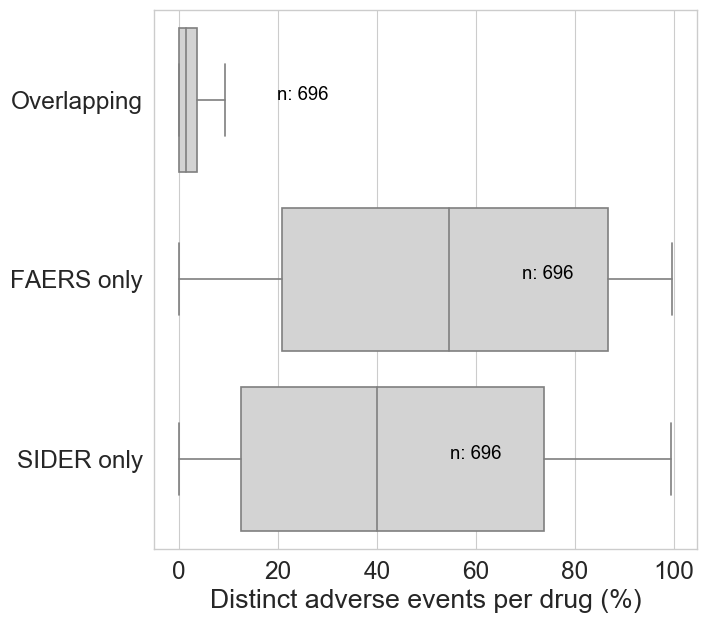

In [93]:
medians = ae_overlap_df.median()
nobs =  ae_overlap_df.count().apply(lambda x: 'n: {:,}'.format(x))


plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.set_context("paper", font_scale = 2)


ax = sns.boxplot(data=ae_overlap_df, orient='h', color='lightgrey', showfliers=False)

for tick, label in enumerate(ax.get_yticklabels()):
    ax_sex = label.get_text()
    num = nobs[ax_sex]
    med_val= medians[ax_sex]
    if ax_sex=='Overlapping':
        med_val=5

    ax.text(med_val + 20,tick ,  num,
                horizontalalignment='center', size='x-small', color='black')

ax.set_xlabel('Distinct adverse events per drug (%)')
plt.savefig(f'{project_dir}/figures/{current_date}_Dist_AEs_overlapping.png', dpi=150, bbox_inches='tight')
